<a href="https://colab.research.google.com/github/VictorCC-Repo/ONLINE_DS_THEBRIDGE_VICTOR_CABALLERO/blob/main/05_Deep_Learning/18_Practica_Obligatoria_Redes_Convolucionales_I__CV_con_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import zipfile

# Definir la carpeta que contiene los archivos ZIP
ruta_carpeta_zip =  "/content/drive/My Drive/Practica_obligatoria_unidad_1/data"
archivos_zip = [f for f in os.listdir(ruta_carpeta_zip) if f.endswith('.zip')]

# Descomprimir cada archivo ZIP
for archivo_zip in archivos_zip:
    ruta_completa_zip = os.path.join(ruta_carpeta_zip, archivo_zip)
    with zipfile.ZipFile(ruta_completa_zip, 'r') as zip_ref:
        zip_ref.extractall("/content/archivos_descomprimidos")  # Ruta destino en Colab

# Verificar archivos descomprimidos
os.listdir("/content/archivos_descomprimidos")


['github_test',
 'github_train_3',
 'github_train_2',
 'github_train_0',
 'github_train_1']

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras.



In [23]:
# Función para leer y procesar las imágenes usando tensorflow.keras.preprocessing.image
def read_data(directorio, reshape_dim=(32, 32)):
    X = []
    y = []
    for file in os.listdir(directorio):
        filepath = os.path.join(directorio, file)
        if os.path.isfile(filepath):
            # Leer y redimensionar la imagen con keras
            img = image.load_img(filepath, target_size=reshape_dim)

            # Convertir la imagen en array y normalizar (escala de 0 a 1)
            img_array = image.img_to_array(img) / 255.0

            # Obtener la etiqueta a partir del nombre del archivo
            label = 0 if 'cat' in file else 1  # 0 para gatos, 1 para perros

            # Agregar la imagen y la etiqueta a las listas
            X.append(img_array)
            y.append(label)

    return np.array(X), np.array(y)

In [27]:
# Leer imágenes del directorio de entrenamiento
directorio_train ='/content/archivos_descomprimidos/github_train_0'
X_train_0, y_train_0 = read_data(directorio_train)

directorio_train = '/content/archivos_descomprimidos/github_train_1'
X_train_1, y_train_1 = read_data(directorio_train)

directorio_train = '/content/archivos_descomprimidos/github_train_2'
X_train_2, y_train_2 = read_data(directorio_train)

directorio_train = '/content/archivos_descomprimidos/github_train_3'
X_train_3, y_train_3 = read_data(directorio_train)


In [28]:
# Concatenar todas las imágenes y etiquetas para obtener un único conjunto de entrenamiento
X_train = np.concatenate([X_train_0, X_train_1,X_train_2, X_train_3], axis=0)
y_train = np.concatenate([y_train_0, y_train_1,y_train_2, y_train_3], axis=0)

In [30]:
# Leer las imágenes de prueba
directorio_test = '/content/archivos_descomprimidos/github_test'
X_test, y_test = read_data(directorio_test)

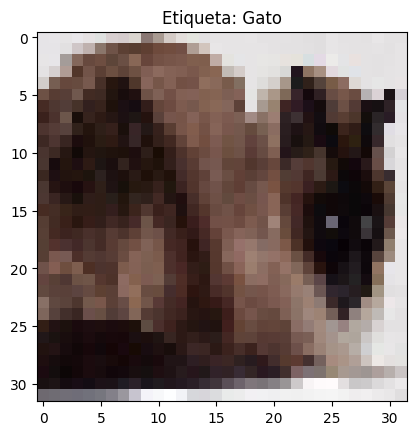

In [31]:
# Visualizar una imagen de entrenamiento
plt.imshow(X_train[0])
plt.title(f'Etiqueta: {"Gato" if y_train[0] == 0 else "Perro"}')
plt.show()


In [32]:
#Ver dimensiones de los datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (4000, 32, 32, 3)
Dimensiones de y_train: (4000,)
Dimensiones de X_test: (1000, 32, 32, 3)
Dimensiones de y_test: (1000,)


2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

In [36]:
# Generadores imágenes con Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [39]:
# Solo normalización conjunto de prueba
test_datagen = ImageDataGenerator()

In [40]:
# Preparación de los generadores para los datos
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

In [42]:
# Construcción del modelo de red convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Cambiamos a salida binaria para clas binaria
])

In [45]:
#Compilar modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Ajustado a clas binaria
              metrics=['accuracy'])

In [46]:
# Mostrar la estructura del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,041 (621.25 KB)

 Trainable params: 159,041 (621.25 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Entrenamiento del modelo con los generadores de imágenes
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.5075 - loss: 0.6977 - val_accuracy: 0.5430 - val_loss: 0.6878
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.5447 - loss: 0.6902 - val_accuracy: 0.5560 - val_loss: 0.6823
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.5550 - loss: 0.6811 - val_accuracy: 0.5410 - val_loss: 0.6992
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.5973 - loss: 0.6629 - val_accuracy: 0.6370 - val_loss: 0.6426
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.6077 - loss: 0.6557 - val_accuracy: 0.6120 - val_loss: 0.7022
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.6287 - loss: 0.6474 - val_accuracy: 0.6350 - val_loss: 0.6474
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.6297 - loss: 0.6462 - val_accuracy: 0.6300 - val_loss: 0.6498
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.6311 - loss: 0.6348 

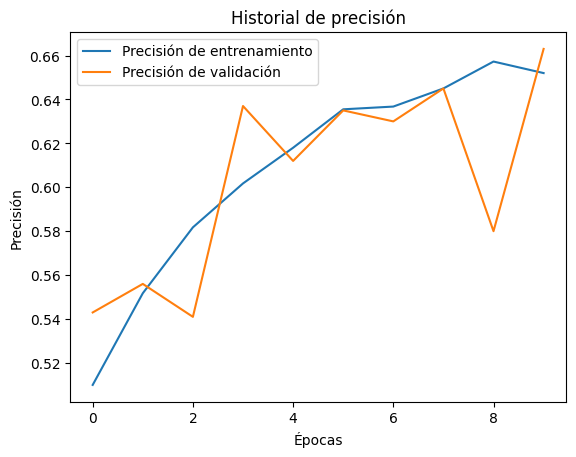

In [48]:
# Visualizar rendimiento del modelo
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Historial de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [49]:
# Evaluación del modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_acc}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6651 - loss: 0.6633
Precisión en el conjunto de prueba: 0.6629999876022339
